In [6]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt



In [108]:
Data = 'Online Retail Data Set.xlsx'

In [109]:
df = pd.read_excel(Data, engine='openpyxl')

In [110]:
print(df.shape)

(541909, 8)


In [16]:
df.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Cust

In [31]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [32]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [111]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [34]:
df['Quantity'].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     56,     72,    200,
          600,    480,     -6,     14,     -2,     11,     33,     13,
           -4,     -5,     -7,     -3,     70,    252,     60,    216,
          384,    -10,     27,     15,     22,     19,     17,     21,
           34,     47,    108,     52,  -9360,    -38,     75,    270,
           42,    240,     90,    320,   1824,    204,     69,    -36,
         -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
           26,   1440,     31,     82,     78,     97,     98,     35,
           57,    -20,    110,    -22,    -30,    -70,   -130,    -80,
         -120,    -40,    -25,    -14,    -15,    -69,   -140,   -320,
      

In [114]:
# Crear nueva columna de Delivered
df['Delivered'] = df['Quantity'].apply(lambda x: x if x > 0 else None)

In [36]:
df['Delivered'].unique()

array([6.0000e+00, 8.0000e+00, 2.0000e+00, 3.2000e+01, 3.0000e+00,
       4.0000e+00, 2.4000e+01, 1.2000e+01, 4.8000e+01, 1.8000e+01,
       2.0000e+01, 3.6000e+01, 8.0000e+01, 6.4000e+01, 1.0000e+01,
       1.2000e+02, 9.6000e+01, 2.3000e+01, 5.0000e+00, 1.0000e+00,
              nan, 5.0000e+01, 4.0000e+01, 1.0000e+02, 1.9200e+02,
       4.3200e+02, 1.4400e+02, 2.8800e+02, 1.6000e+01, 9.0000e+00,
       1.2800e+02, 2.5000e+01, 3.0000e+01, 2.8000e+01, 7.0000e+00,
       5.6000e+01, 7.2000e+01, 2.0000e+02, 6.0000e+02, 4.8000e+02,
       1.4000e+01, 1.1000e+01, 3.3000e+01, 1.3000e+01, 7.0000e+01,
       2.5200e+02, 6.0000e+01, 2.1600e+02, 3.8400e+02, 2.7000e+01,
       1.5000e+01, 2.2000e+01, 1.9000e+01, 1.7000e+01, 2.1000e+01,
       3.4000e+01, 4.7000e+01, 1.0800e+02, 5.2000e+01, 7.5000e+01,
       2.7000e+02, 4.2000e+01, 2.4000e+02, 9.0000e+01, 3.2000e+02,
       1.8240e+03, 2.0400e+02, 6.9000e+01, 1.6000e+02, 2.8800e+03,
       1.4000e+03, 3.9000e+01, 2.6000e+01, 1.4400e+03, 3.1000e

In [115]:
# Redondear los números en la columna 'Delivered' a dos decimales
df['Delivered'] = df['Delivered'].round(2)

In [116]:
# Convertir los valores en notación científica a formato decimal
df['Delivered'] = df['Delivered'].apply(lambda x: '{:.2f}'.format(x) if pd.notnull(x) else x)

In [117]:
df['Delivered'].unique()

array(['6.00', '8.00', '2.00', '32.00', '3.00', '4.00', '24.00', '12.00',
       '48.00', '18.00', '20.00', '36.00', '80.00', '64.00', '10.00',
       '120.00', '96.00', '23.00', '5.00', '1.00', nan, '50.00', '40.00',
       '100.00', '192.00', '432.00', '144.00', '288.00', '16.00', '9.00',
       '128.00', '25.00', '30.00', '28.00', '7.00', '56.00', '72.00',
       '200.00', '600.00', '480.00', '14.00', '11.00', '33.00', '13.00',
       '70.00', '252.00', '60.00', '216.00', '384.00', '27.00', '15.00',
       '22.00', '19.00', '17.00', '21.00', '34.00', '47.00', '108.00',
       '52.00', '75.00', '270.00', '42.00', '240.00', '90.00', '320.00',
       '1824.00', '204.00', '69.00', '160.00', '2880.00', '1400.00',
       '39.00', '26.00', '1440.00', '31.00', '82.00', '78.00', '97.00',
       '98.00', '35.00', '57.00', '110.00', '720.00', '156.00', '324.00',
       '38.00', '37.00', '49.00', '95.00', '29.00', '41.00', '402.00',
       '378.00', '150.00', '300.00', '54.00', '104.00', '67.00

In [118]:
# Crear la columna 'Pending_Shipping' y mover los valores negativos de 'Quantity' a 'Pending_Shipping'
df['Pending_Shipping'] = df.loc[df['Quantity'] < 0, 'Quantity']

# Reemplazar los valores negativos de 'Quantity' con NaN
df.loc[df['Quantity'] < 0, 'Quantity'] = pd.NA

In [120]:
# Convertir los valores en notación científica a formato decimal
df['Pending_Shipping'] = df['Pending_Shipping'].apply(lambda x: '{:.2f}'.format(x) if pd.notnull(x) else x)

In [121]:
# Redondear los números en la columna 'Delivered' a dos decimales
df['Pending_Shipping'] = df['Pending_Shipping'].round(2)

In [122]:
print(df['Pending_Shipping'].unique())

[nan '-1.00' '-12.00' '-24.00' '-6.00' '-2.00' '-4.00' '-5.00' '-7.00'
 '-3.00' '-10.00' '-9360.00' '-38.00' '-36.00' '-192.00' '-144.00'
 '-48.00' '-50.00' '-20.00' '-22.00' '-30.00' '-70.00' '-130.00' '-80.00'
 '-120.00' '-40.00' '-25.00' '-14.00' '-15.00' '-69.00' '-140.00'
 '-320.00' '-8.00' '-9.00' '-11.00' '-72.00' '-35.00' '-21.00' '-43.00'
 '-19.00' '-18.00' '-44.00' '-77.00' '-223.00' '-150.00' '-13.00' '-33.00'
 '-723.00' '-177.00' '-32.00' '-100.00' '-28.00' '-145.00' '-47.00'
 '-96.00' '-60.00' '-16.00' '-240.00' '-300.00' '-500.00' '-23.00'
 '-106.00' '-54.00' '-17.00' '-939.00' '-201.00' '-53.00' '-29.00'
 '-2600.00' '-990.00' '-290.00' '-45.00' '-310.00' '-61.00' '-41.00'
 '-74215.00' '-64.00' '-84.00' '-1400.00' '-57.00' '-59.00' '-31.00'
 '-600.00' '-42.00' '-94.00' '-207.00' '-52.00' '-206.00' '-217.00'
 '-1430.00' '-162.00' '-230.00' '-173.00' '-390.00' '-234.00' '-76.00'
 '-200.00' '-99.00' '-92.00' '-741.00' '-400.00' '-114.00' '-88.00'
 '-720.00' '-86.00' '-391.00

In [126]:
# Utiliza el método isnull() para verificar los valores nulos y el método sum() para obtener el recuento de valores nulos en cada columna
valores_nulos_por_columna = df.isnull().sum()

# Imprime el recuento de valores nulos por columna
print(valores_nulos_por_columna)

InvoiceNo                0
StockCode                0
Description           1454
Quantity             10624
InvoiceDate              0
UnitPrice                0
CustomerID          135080
Country                  0
Delivered            10624
Pending_Shipping    531285
dtype: int64


In [127]:
# Suponiendo que ya tienes un DataFrame llamado df
# Utiliza la indexación booleana para filtrar las filas donde el valor en la columna 'Quantity' es nulo
filas_valores_nulos = df[df['Quantity'].isnull()]

# Imprime las filas con valores nulos en la columna 'Quantity'
print(filas_valores_nulos)

       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount       NaN   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS       NaN   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        NaN   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        NaN   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        NaN   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       NaN   
541541   C581499         M                            Manual       NaN   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE       NaN   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER       NaN   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT       NaN   

               InvoiceDate  UnitPrice  CustomerID         Country Delivered  \
141    2010-12-01 09:41:00      

In [130]:
# Reemplazar los valores NaN en la columna 'Description' con 'SD'
filas_valores_nulos['Description'].fillna('0', inplace=True)

C:\Users\karin\AppData\Local\Temp\ipykernel_3572\116445708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filas_valores_nulos['Description'].fillna('0', inplace=True)


In [131]:
# Filtrar los valores NaN en la serie 'Description'
descripcion_no_nan = filas_valores_nulos['Description'].dropna()


In [132]:
# Reemplazar los valores NaN en la serie 'Description' con una cadena vacía
descripcion_no_nan_filled = descripcion_no_nan.fillna('')


In [133]:
# Reemplazar los valores NaN en la serie 'Description' con una cadena vacía
descripcion_no_nan_filled = descripcion_no_nan.apply(lambda x: '' if pd.isnull(x) else x)


In [134]:
# Reemplazar los valores NaN en la serie 'Description' con una cadena vacía
descripcion_no_nan_filled = descripcion_no_nan.apply(lambda x: '' if pd.isnull(x) else str(x))


In [135]:
# Filtrar las filas donde la serie 'Description' (después de reemplazar NaN) contiene el valor 'Discount'
descripcion_discount = filas_valores_nulos[descripcion_no_nan_filled.str.contains('Discount')]

# Imprimir las filas con 'Description' que contiene 'Discount'
print(descripcion_discount)

       InvoiceNo StockCode Description  Quantity         InvoiceDate  \
141      C536379         D    Discount       NaN 2010-12-01 09:41:00   
9038     C537164         D    Discount       NaN 2010-12-05 13:21:00   
14498    C537597         D    Discount       NaN 2010-12-07 12:34:00   
19392    C537857         D    Discount       NaN 2010-12-08 16:00:00   
31134    C538897         D    Discount       NaN 2010-12-15 09:14:00   
...          ...       ...         ...       ...                 ...   
479868   C577227         D    Discount       NaN 2011-11-18 12:06:00   
479869   C577227         D    Discount       NaN 2011-11-18 12:06:00   
493613   C578239         D    Discount       NaN 2011-11-23 12:29:00   
516221   C579884         D    Discount       NaN 2011-11-30 17:34:00   
516455   C579908         D    Discount       NaN 2011-12-01 08:49:00   

        UnitPrice  CustomerID         Country Delivered Pending_Shipping  
141         27.50     14527.0  United Kingdom       NaN     

In [136]:
descripcion_discount['Description'].count()

77

In [137]:
def crear_columna_discount(descripcion_discount):
    # Filtrar las filas donde la columna 'Description' contiene el valor 'Discount'
    descripcion_discount = descripcion_discount[descripcion_discount['Description'].str.contains('Discount')]
    
    # Crear una nueva columna 'Discount' y asignar los valores de la columna 'UnitPrice'
    descripcion_discount['Discount'] = descripcion_discount['UnitPrice']
    
    return descripcion_discount

# Llamar a la función con tu DataFrame
descripcion_discount = crear_columna_discount(descripcion_discount)

In [138]:
descripcion_discount

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Delivered,Pending_Shipping,Discount
141,C536379,D,Discount,NaN,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,NaN,-1.00,27.50
9038,C537164,D,Discount,NaN,2010-12-05 13:21:00,29.29,14527.0,United Kingdom,NaN,-1.00,29.29
14498,C537597,D,Discount,NaN,2010-12-07 12:34:00,281.00,15498.0,United Kingdom,NaN,-1.00,281.00
19392,C537857,D,Discount,NaN,2010-12-08 16:00:00,267.12,17340.0,United Kingdom,NaN,-1.00,267.12
31134,C538897,D,Discount,NaN,2010-12-15 09:14:00,5.76,16422.0,United Kingdom,NaN,-1.00,5.76
...,...,...,...,...,...,...,...,...,...,...,...
479868,C577227,D,Discount,NaN,2011-11-18 12:06:00,19.82,14527.0,United Kingdom,NaN,-1.00,19.82
479869,C577227,D,Discount,NaN,2011-11-18 12:06:00,16.76,14527.0,United Kingdom,NaN,-1.00,16.76
493613,C578239,D,Discount,NaN,2011-11-23 12:29:00,26.33,14912.0,Italy,NaN,-1.00,26.33
516221,C579884,D,Discount,NaN,2011-11-30 17:34:00,20.53,14527.0,United Kingdom,NaN,-1.00,20.53


In [139]:
# Convertir la columna 'Pending_Shipping' a tipo numérico
descripcion_discount['Pending_Shipping'] = pd.to_numeric(descripcion_discount['Pending_Shipping'], errors='coerce')

# Reemplazar los valores de -1.00 con 'SD' en la columna 'Pending_Shipping'
descripcion_discount['Pending_Shipping'] = descripcion_discount['Pending_Shipping'].replace(-1.00, 'SD')

In [106]:
df['Discount'].unique()

array([nan])

In [142]:
# Fusionar el DataFrame original 'df' con el DataFrame 'descripcion_discount' en función de 'InvoiceNo'
df = df.merge(descripcion_discount[['InvoiceNo', 'Discount']], how='left', on='InvoiceNo')

In [145]:
# Calcular la suma de las ventas por pais
ventas_por_pais = df.groupby('Country')['UnitPrice'].sum()

In [146]:
#Seleccionar los 5 paises con mayores ventas
top_5_paises = ventas_por_pais.nlargest(5)

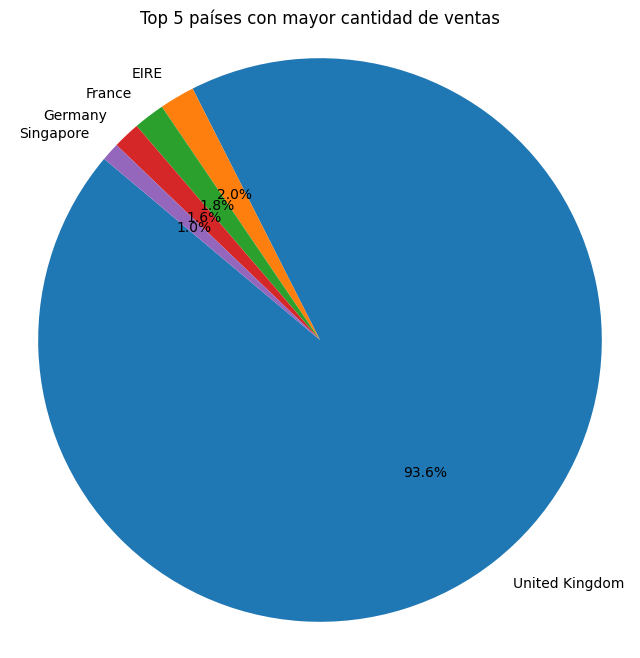

In [147]:
#Crear un grafico de torta
plt.figure(figsize=(8,8))
plt.pie(top_5_paises, labels=top_5_paises.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 países con mayor cantidad de ventas')
plt.axis('equal')  # Hace que el gráfico de torta sea circular
plt.show()

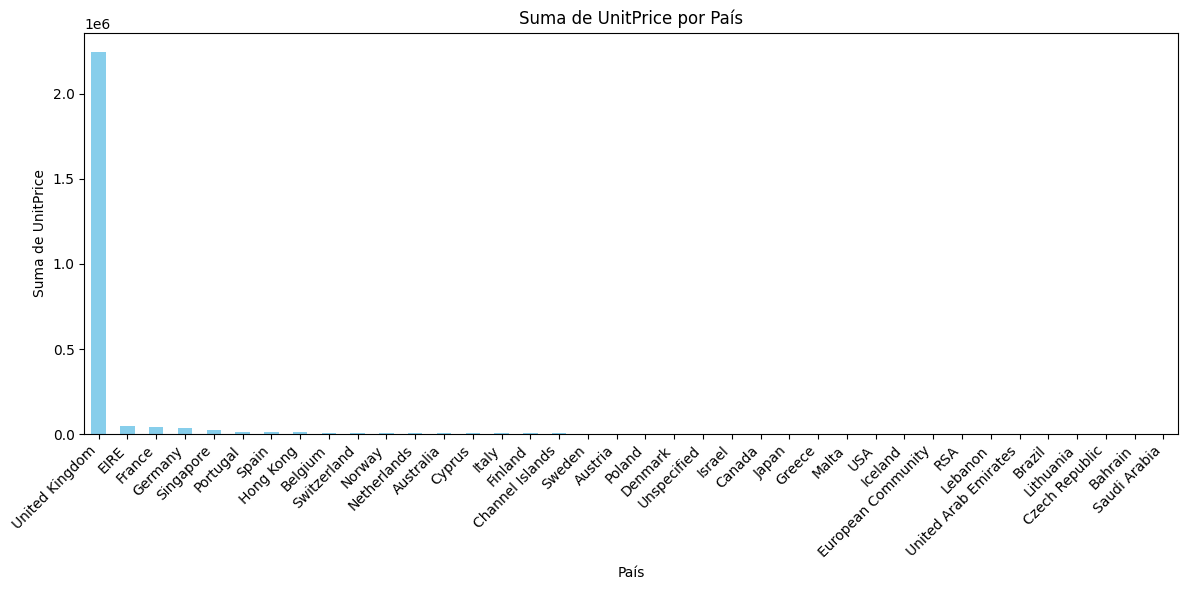

In [148]:
# Calcular la suma de la columna 'UnitPrice' agrupada por país
ventas_por_pais = df.groupby('Country')['UnitPrice'].sum()

# Ordenar los datos de manera descendente para mostrar los países con mayores ventas primero
ventas_por_pais = ventas_por_pais.sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
ventas_por_pais.plot(kind='bar', color='skyblue')
plt.title('Suma de UnitPrice por País')
plt.xlabel('País')
plt.ylabel('Suma de UnitPrice')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

1)) 
El CEO de la tienda minorista está interesado en ver la serie temporal de los datos de ingresos para el año 2011 solamente. 

Le gustaría ver datos granulares analizando los ingresos de cada mes. 

El CEO está interesado en ver las tendencias estacionales y quiere profundizar en por qué se producen estas tendencias.

Este análisis será útil para que el CEO pronostique para el próximo año.



Para filtrar los datos del año 2011 y de los 10 países (excluyendo al Reino Unido) con más ventas en la columna 'UnitPrice', puedes seguir estos pasos:

Filtrar los datos del año 2011.
Excluir las ventas del Reino Unido.
Calcular las ventas totales por país.
Seleccionar los 10 países (excluyendo al Reino Unido) con las mayores ventas.
Filtrar los datos originales para incluir solo las ventas de los países seleccionados.

In [149]:
def filtrar_ventas_top_paises_2011(df):
    # Convertir la columna 'InvoiceDate' a tipo datetime
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    
    # Filtrar los datos del año 2011
    df_2011 = df[df['InvoiceDate'].dt.year == 2011]
    
    # Excluir las ventas del Reino Unido
    df_excluyendo_uk = df_2011[df_2011['Country'] != 'United Kingdom']
    
    # Calcular las ventas totales por país
    ventas_por_pais = df_excluyendo_uk.groupby('Country')['UnitPrice'].sum()
    
    # Seleccionar los 10 países con las mayores ventas (excluyendo al Reino Unido)
    top_10_paises = ventas_por_pais.nlargest(10)
    
    # Filtrar los datos originales para incluir solo las ventas de los países seleccionados
    df_filtrado = df_excluyendo_uk[df_excluyendo_uk['Country'].isin(top_10_paises.index)]
    
    return df_filtrado

# Llamada a la función
df_ventas_top_paises_2011 = filtrar_ventas_top_paises_2011(df)

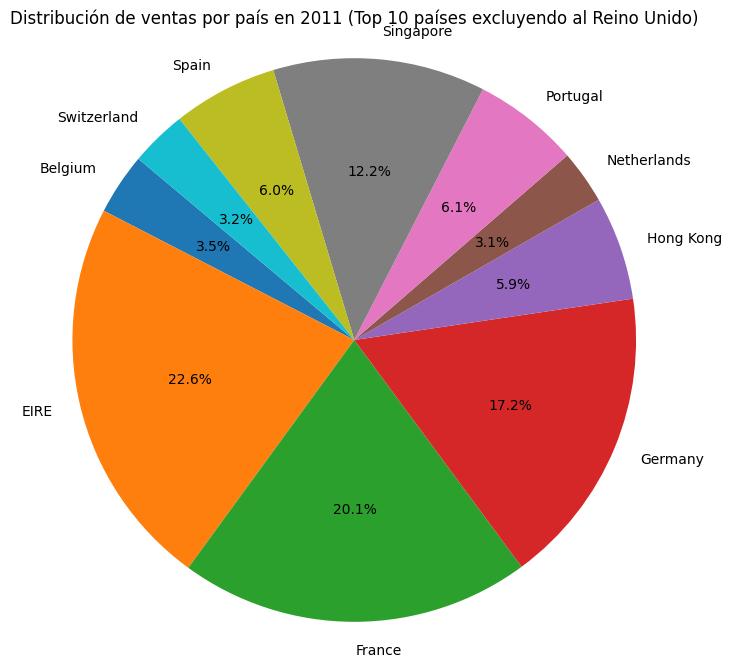

In [150]:
# Calcular las ventas totales por país
ventas_por_pais = df_ventas_top_paises_2011.groupby('Country')['UnitPrice'].sum()

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(ventas_por_pais, labels=ventas_por_pais.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de ventas por país en 2011 (Top 10 países excluyendo al Reino Unido)')
plt.axis('equal')  # Hace que el gráfico de torta sea circular
plt.show()

In [153]:
# Convertir la columna 'InvoiceDate' a tipo datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Filtrar los datos para incluir solo el año 2011
df_2011 = df[df['InvoiceDate'].dt.year == 2011]

In [154]:
df_2011

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Delivered,Pending_Shipping,Discount
42483,539993,22386,JUMBO BAG PINK POLKADOT,10.0,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,10.00,NaN,NaN
42484,539993,21499,BLUE POLKADOT WRAP,25.0,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,25.00,NaN,NaN
42485,539993,21498,RED RETROSPOT WRAP,25.0,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,25.00,NaN,NaN
42486,539993,22379,RECYCLING BAG RETROSPOT,5.0,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,5.00,NaN,NaN
42487,539993,20718,RED RETROSPOT SHOPPER BAG,10.0,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,10.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
541942,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09 12:50:00,0.85,12680.0,France,12.00,NaN,NaN
541943,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09 12:50:00,2.10,12680.0,France,6.00,NaN,NaN
541944,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09 12:50:00,4.15,12680.0,France,4.00,NaN,NaN
541945,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09 12:50:00,4.15,12680.0,France,4.00,NaN,NaN


In [156]:
# Agrupar los datos por mes y calcular las ventas totales de cada mes
ventas_por_mes = df_2011.resample('ME', on='InvoiceDate')['UnitPrice'].sum()

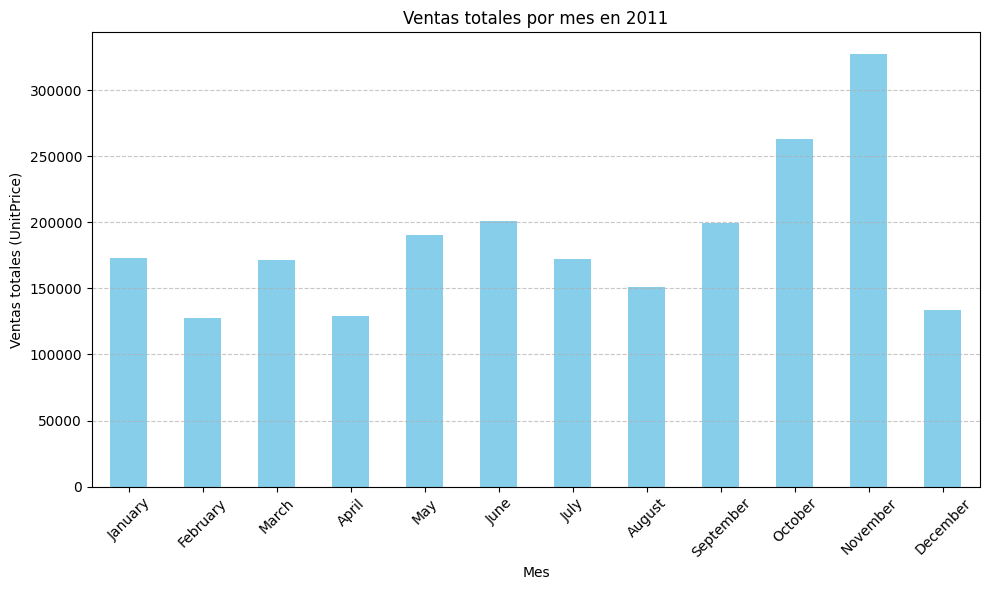

In [158]:
# Crear un diccionario de nombres de meses en inglés
meses_ingles = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
                7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Cambiar las etiquetas del eje x a los nombres de los meses en inglés
meses = [meses_ingles[mes.month] for mes in ventas_por_mes.index]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ventas_por_mes.plot(kind='bar', color='skyblue')
plt.title('Ventas totales por mes en 2011')
plt.xlabel('Mes')
plt.ylabel('Ventas totales (UnitPrice)')
plt.xticks(range(len(meses)), meses, rotation=45)  # Cambiar las etiquetas del eje x
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

3)) The CMO of the online retail store wants to view the information on the top 10 customers by revenue. He is interested in a visual that shows the greatest revenue generating customer at the start and gradually declines to the lower revenue generating customers. The CMO wants to target the higher revenue generating customers and ensure that they remain satisfied with their products.

In [161]:
# Agrupar los datos por CustomerID y calculas las ventas totales para cada cliente
ventas_por_cliente = df.groupby('CustomerID')['UnitPrice'].sum()

# Ordenar las ventas totales de mayor a menor
ventas_por_cliente = ventas_por_cliente.sort_values(ascending=False)

# Obtener la lista de CustomerID ordenados por ventas de mayor a menor
clientes_mas_ventas = ventas_por_cliente.index.tolist

# Mostrar la lista de CustomerID con más ventas de mayor a menor
print("Clientes con más ventas de mayor a menor:")
print(clientes_mas_ventas)

Clientes con más ventas de mayor a menor:
<bound method IndexOpsMixin.tolist of Index([14096.0, 15098.0, 14911.0, 12744.0, 16029.0, 17841.0, 12748.0, 12536.0,
       12757.0, 14606.0,
       ...
       13135.0, 16881.0, 13099.0, 15753.0, 14609.0, 17752.0, 13366.0, 12875.0,
       15118.0, 13256.0],
      dtype='float64', name='CustomerID', length=4372)>


In [162]:
# Crear una lista de tuplas con el código del cliente y el valor total de ventas
lista_ventas_por_cliente = [(cliente, ventas) for cliente, ventas in ventas_por_cliente.items()]

# Mostrar la lista de ventas por cliente
print("Lista de ventas por cliente (Código del cliente, Total de ventas):")
print(lista_ventas_por_cliente)

Lista de ventas por cliente (Código del cliente, Total de ventas):
[(14096.0, 41376.33), (15098.0, 40278.899999999994), (14911.0, 31060.66), (12744.0, 25108.89), (16029.0, 24111.14), (17841.0, 20333.18), (12748.0, 15115.6), (12536.0, 13255.220000000001), (12757.0, 8035.24), (14606.0, 7839.02), (15502.0, 7836.84), (14156.0, 6544.29), (14527.0, 6430.01), (15311.0, 6267.75), (14646.0, 5400.21), (13089.0, 5166.45), (18102.0, 5159.7300000000005), (15039.0, 4811.72), (17448.0, 4287.63), (17940.0, 3994.91), (16033.0, 3852.33), (13263.0, 3760.4700000000003), (15581.0, 3610.2), (14088.0, 3376.44), (17450.0, 3320.09), (18118.0, 3292.38), (14056.0, 3172.58), (14769.0, 2970.44), (12539.0, 2856.04), (15005.0, 2729.28), (15498.0, 2617.91), (17511.0, 2607.08), (17675.0, 2576.7), (12669.0, 2524.18), (12415.0, 2499.82), (13081.0, 2489.93), (14298.0, 2455.5), (12473.0, 2437.84), (17811.0, 2390.92), (14505.0, 2334.58), (14180.0, 2332.49), (14796.0, 2322.33), (18109.0, 2267.68), (12471.0, 2266.87), (12359

C:\Users\karin\AppData\Local\Temp\ipykernel_3572\4117067217.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


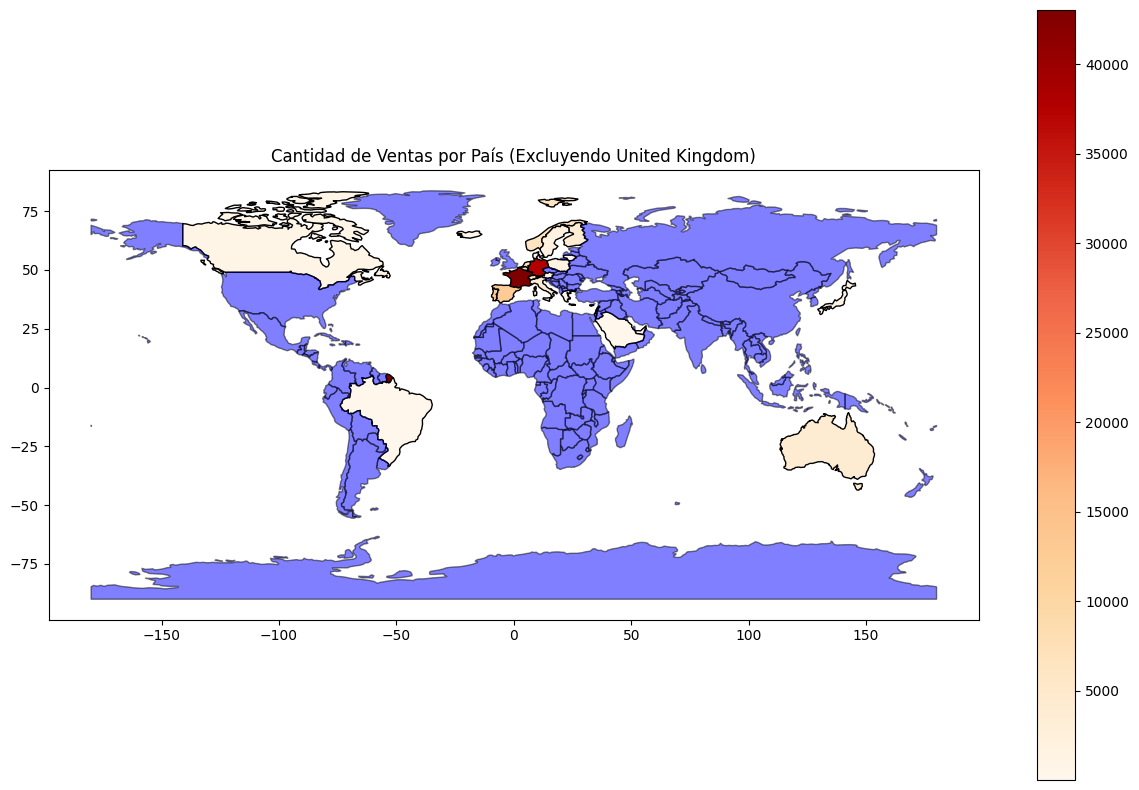

In [184]:
# Cargar los datos geográficos de los países
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Calcular la suma de las ventas por país
ventas_por_pais = df[df['Country'] != 'United Kingdom'].groupby('Country')['UnitPrice'].sum().reset_index()

# Unir los datos geográficos con los datos de ventas
world = world.merge(ventas_por_pais, how='left', left_on='name', right_on='Country')

# Visualizar el mapa geográfico
world.plot(column='UnitPrice', cmap='OrRd', legend=True, figsize=(15, 10),
           missing_kwds={'color': 'blue', 'alpha': 0.5}, edgecolor='black')
plt.title('Cantidad de Ventas por País (Excluyendo United Kingdom)')
plt.show()